In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

# Load Data

In [2]:
train = pd.read_csv('./Data/train.csv') 

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# train.columns

In [5]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

# EDA & Visualizations

### Let's Look at the Numeric Variables

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train.select_dtypes(include=numerics)
numlist = list(num_train)
print(len(numlist),' numeric variables')
print(numlist)

38  numeric variables
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [7]:
num_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# How many Missing Values?
num_train.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Look at the Output/Dependent Variable (Y)

25th percentile: 129975.0
50th percentile: 163000.0
75th percentile: 214000.0
# of Missing Rows:  0  out of  1460


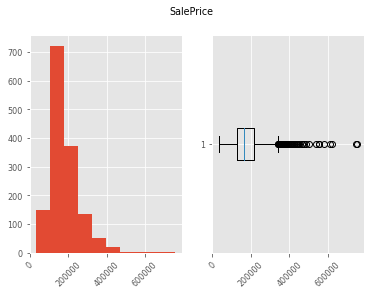

In [9]:
# The Distribution of the OUTPUT/DEPENDENT variable

fig, axs = plt.subplots(1,2)
fig.suptitle('SalePrice')
axs[1].boxplot(num_train['SalePrice'],vert=False)
axs[1].tick_params(axis='x', rotation = 45)
axs[0].hist(num_train['SalePrice'])
axs[0].tick_params(axis='x', rotation=45)

print('25th percentile:',num_train['SalePrice'].quantile(.25))
print('50th percentile:',num_train['SalePrice'].median())
print('75th percentile:',num_train['SalePrice'].quantile(.75))
print('# of Missing Rows: ', num_train['SalePrice'].isna().sum(), 
    ' out of ',len(num_train['SalePrice']))

### Look at the Independent Variable (Xs) Distributions and Correlations with the Output/Dependent Variable (Y)

In [ ]:
#for nvar in numlist:
#    fig, axs = plt.subplots(1,2)
#    fig.suptitle(nvar)
    
#    # Histogram
#    axs[1].hist(num_train[nvar])
#    axs[1].tick_params(axis='x', rotation=45)
#    axs[1].set_ylabel('Count')
#    axs[1].set_xlabel(nvar)
    
#    # Scatter
#    axs[0].scatter(num_train[nvar],num_train['SalePrice'])
#    axs[0].tick_params(axis='x', rotation=45)
#    axs[0].set_ylabel('SalePrice')
#    axs[0].set_xlabel(nvar)

In [10]:
# Correlations between Output variable and other numerical variables
correlations = num_train.corr()
# print(correlations['SalePrice'])
ycorr = correlations['SalePrice']
ycorr[np.abs(ycorr)>0.4]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [11]:
# manually created this, figure out how to do it automatically above
hcorr_list = ['OverallQual','YearBuilt','YearRemodAdd',
             'MasVnrArea','MasVnrArea','TotalBsmtSF', 
             '1stFlrSF','GrLivArea','FullBath',
             'TotRmsAbvGrd','Fireplaces','GarageYrBlt',
             'GarageCars','GarageArea']

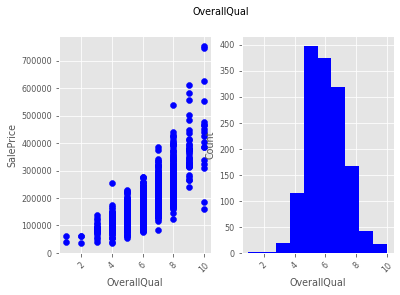

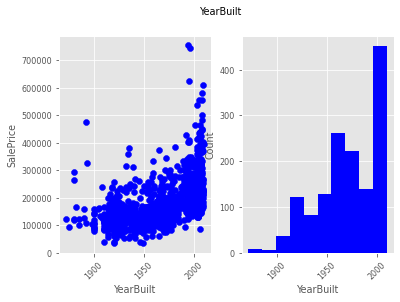

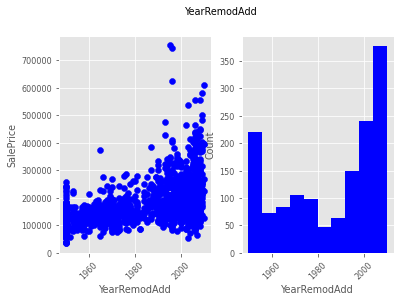

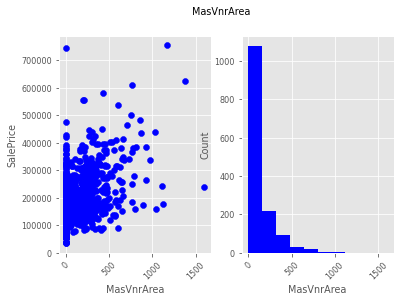

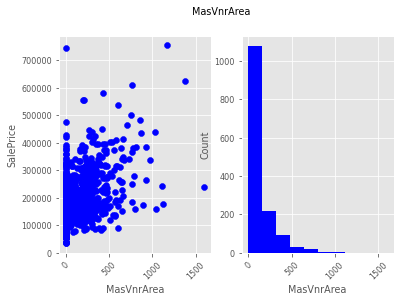

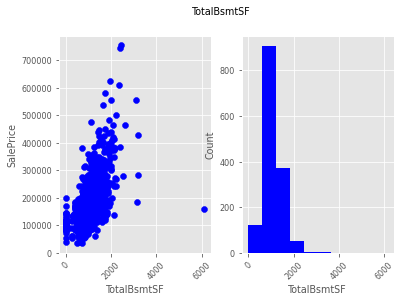

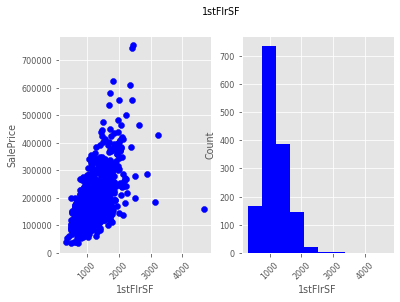

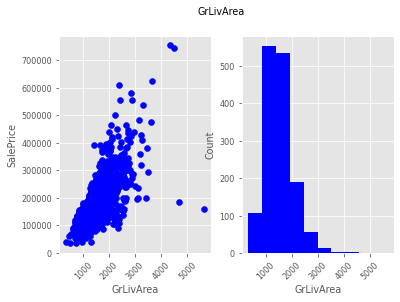

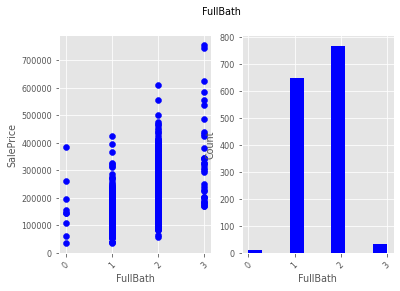

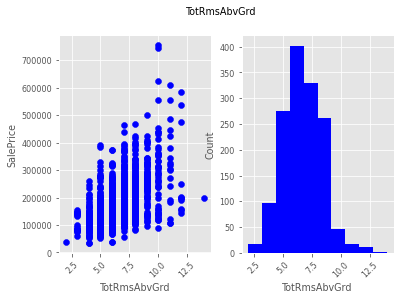

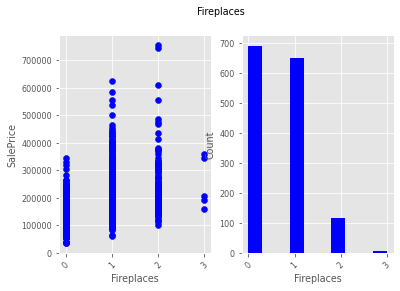

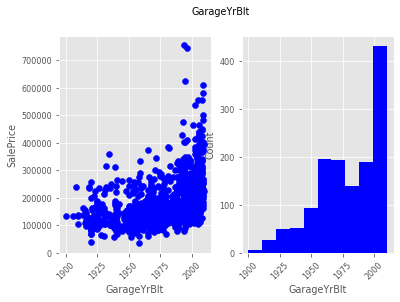

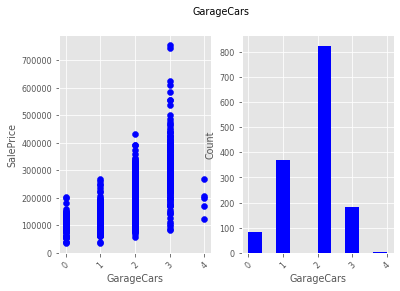

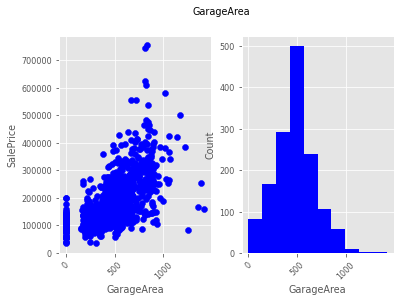

In [12]:
for nvar in hcorr_list:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(num_train[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(num_train[nvar],num_train['SalePrice'],color='b')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

### Let's Look at the Categorical Variables

In [13]:
cattypes = ['O']
cat_train = train.select_dtypes(include=cattypes)
catlist = list(cat_train)
catlist

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [23]:
temp = train.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending=False).reset_index()
print(list(temp['Neighborhood']))

['NridgHt', 'NoRidge', 'StoneBr', 'Timber', 'Somerst', 'Veenker', 'Crawfor', 'ClearCr', 'CollgCr', 'Blmngtn', 'NWAmes', 'Gilbert', 'SawyerW', 'Mitchel', 'NPkVill', 'NAmes', 'SWISU', 'Blueste', 'Sawyer', 'BrkSide', 'Edwards', 'OldTown', 'BrDale', 'IDOTRR', 'MeadowV']


<ipython-input-24-745361cac529>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,8))


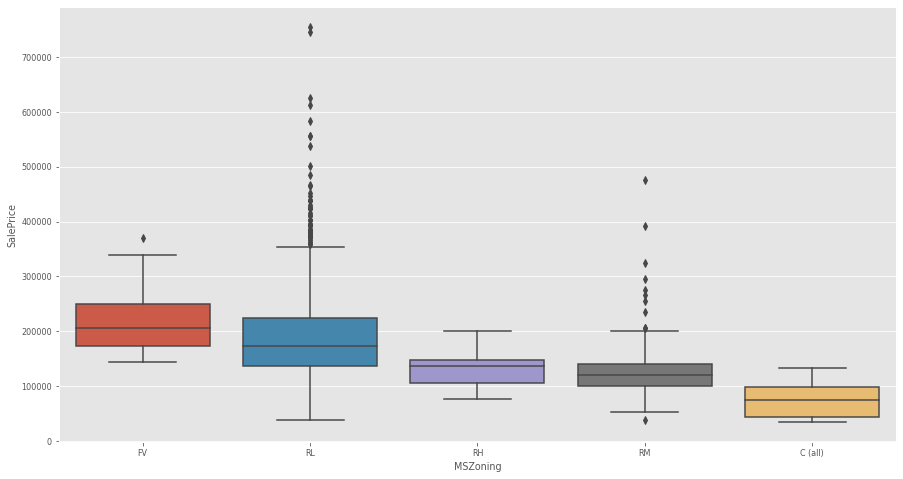

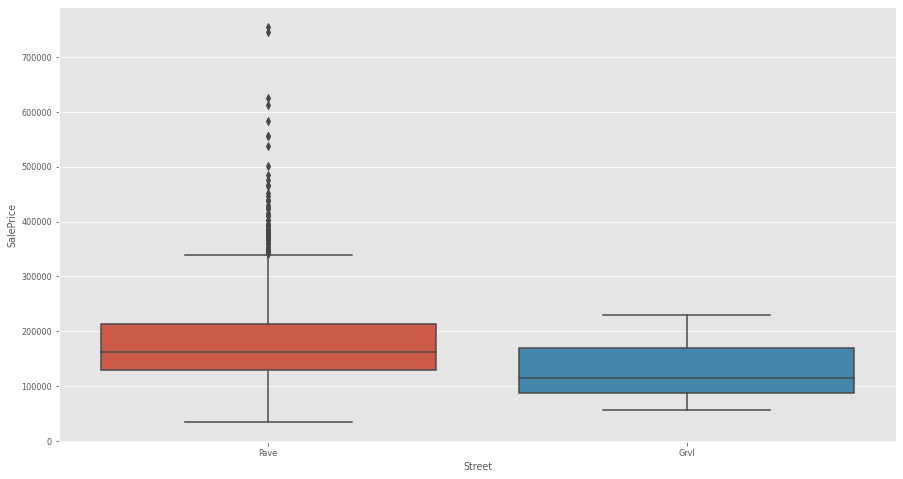

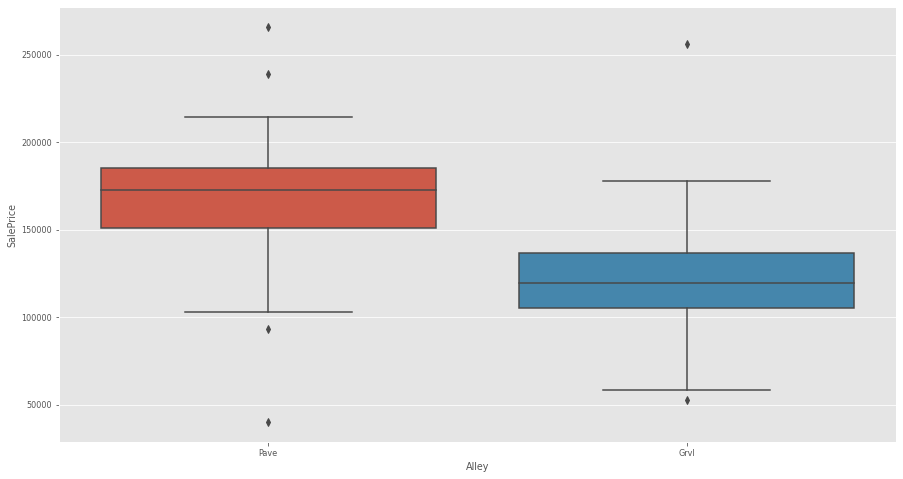

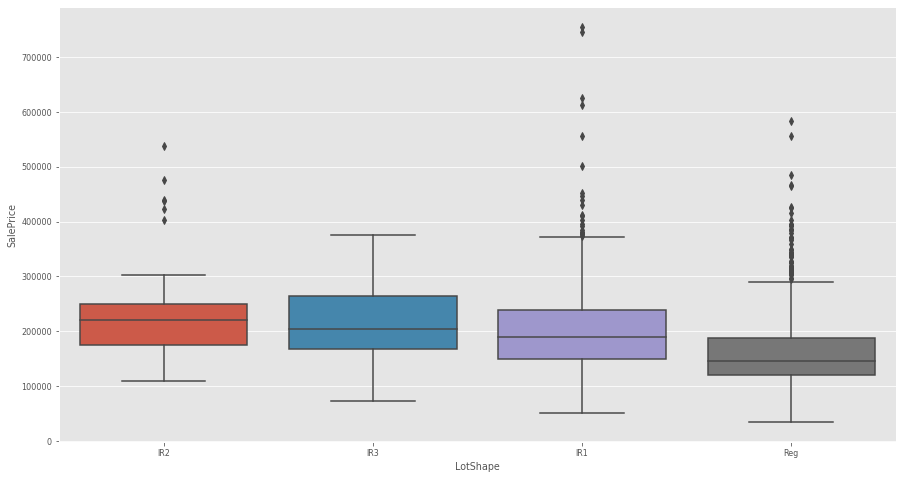

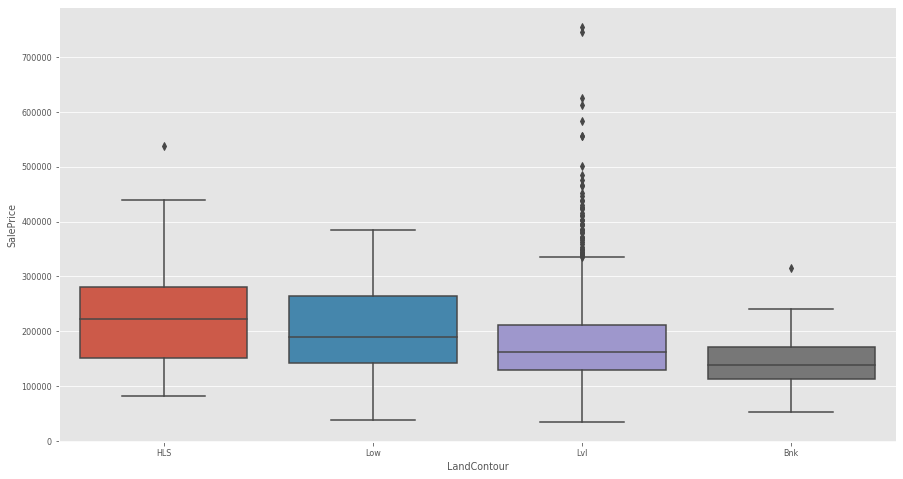

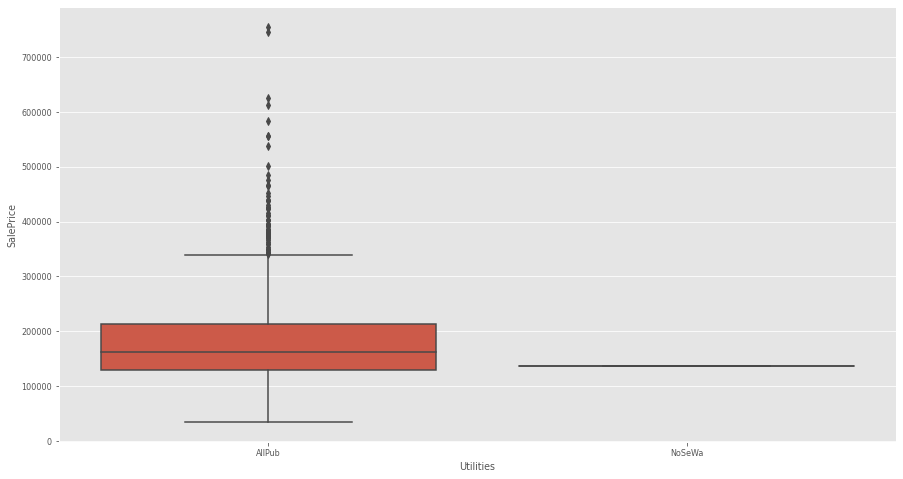

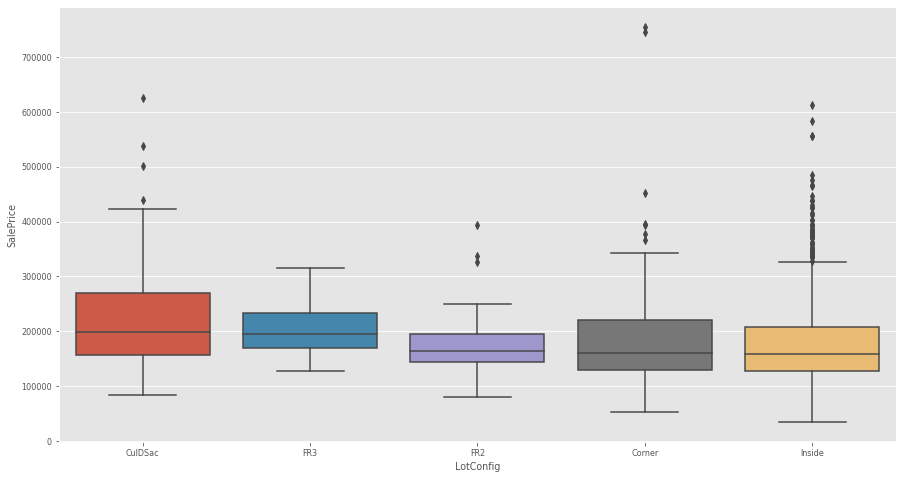

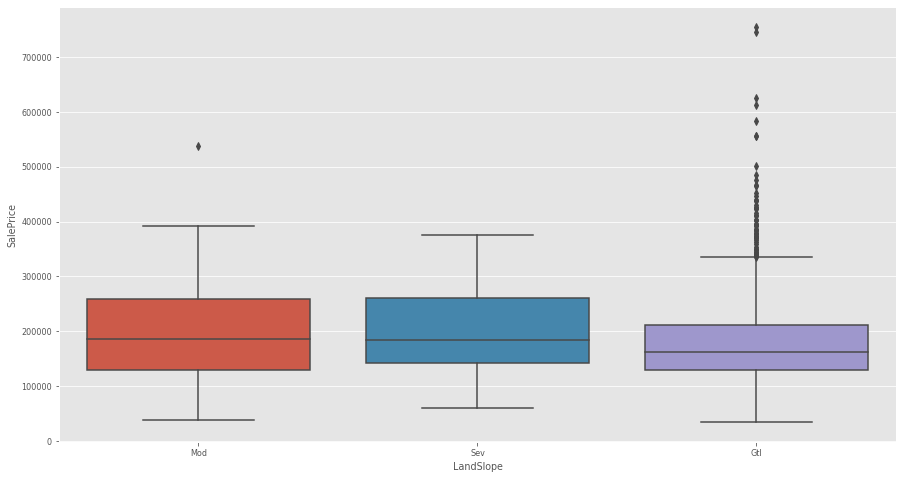

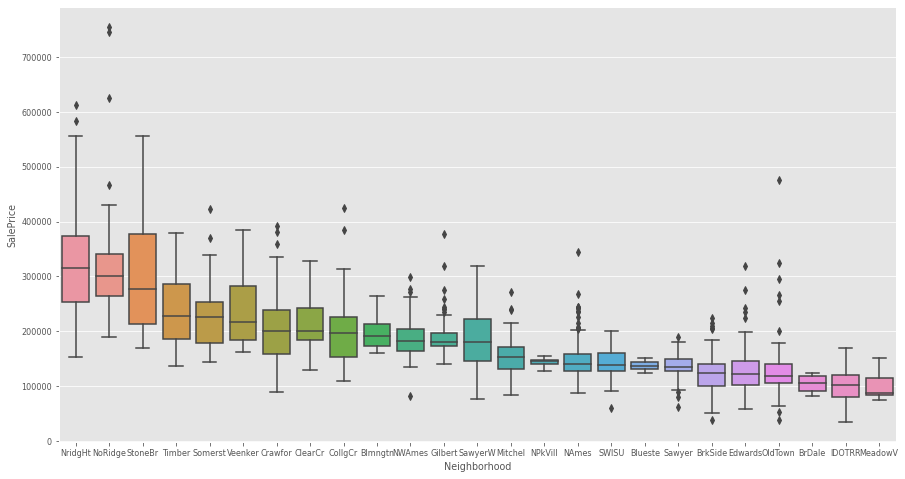

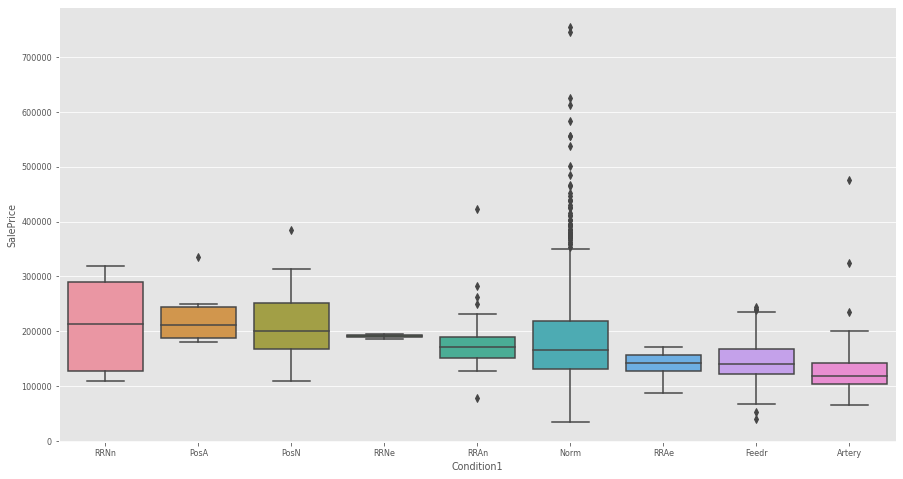

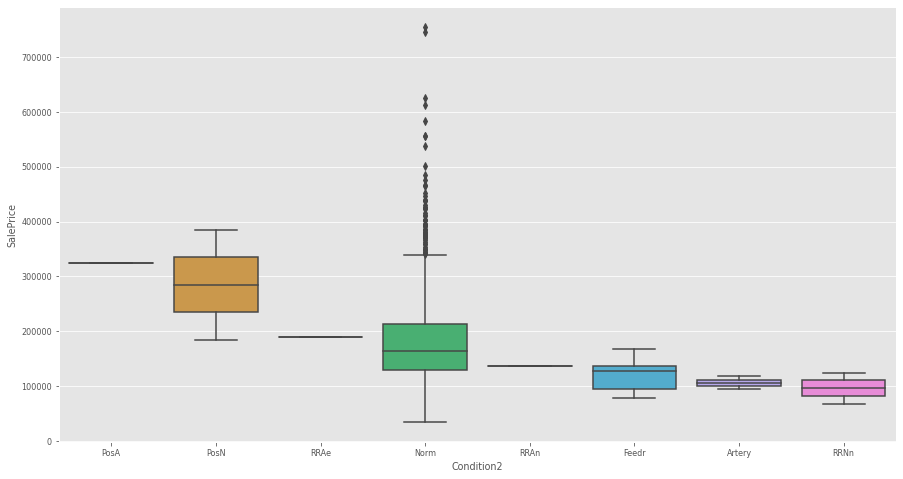

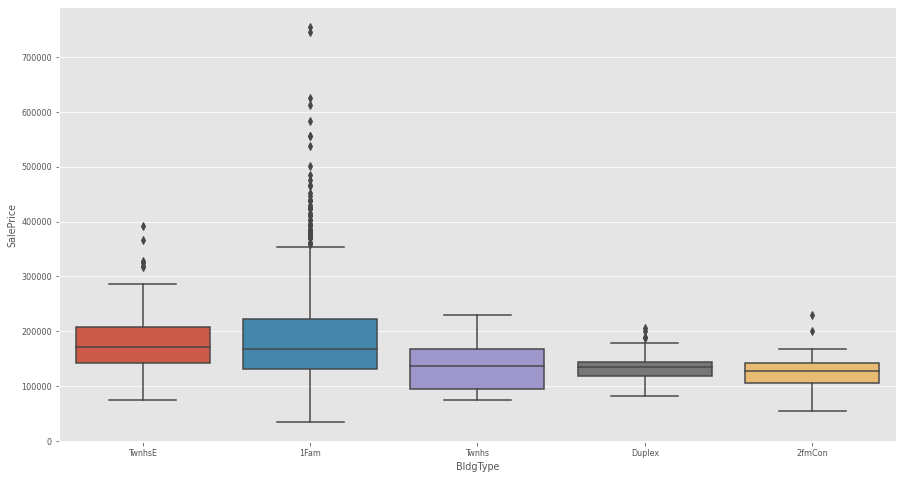

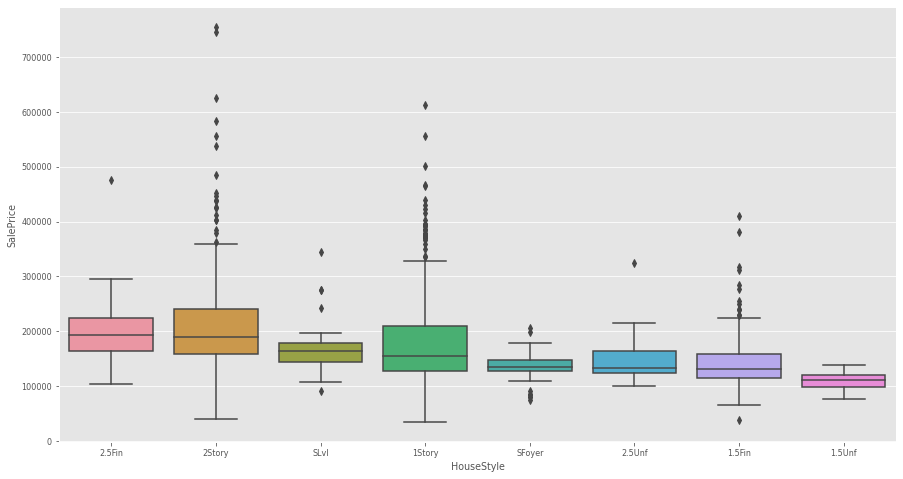

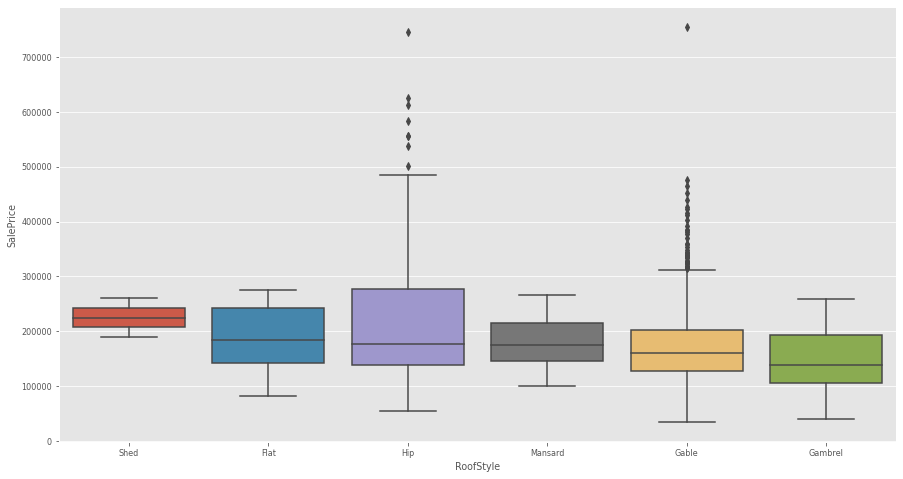

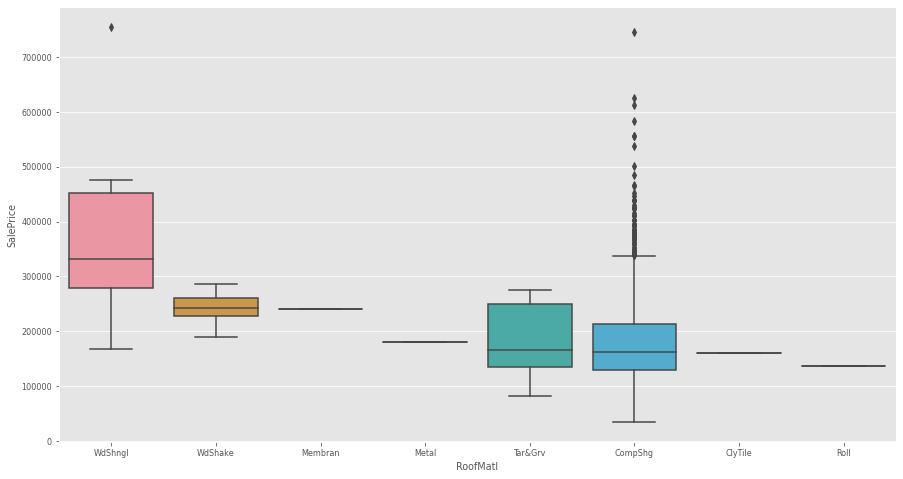

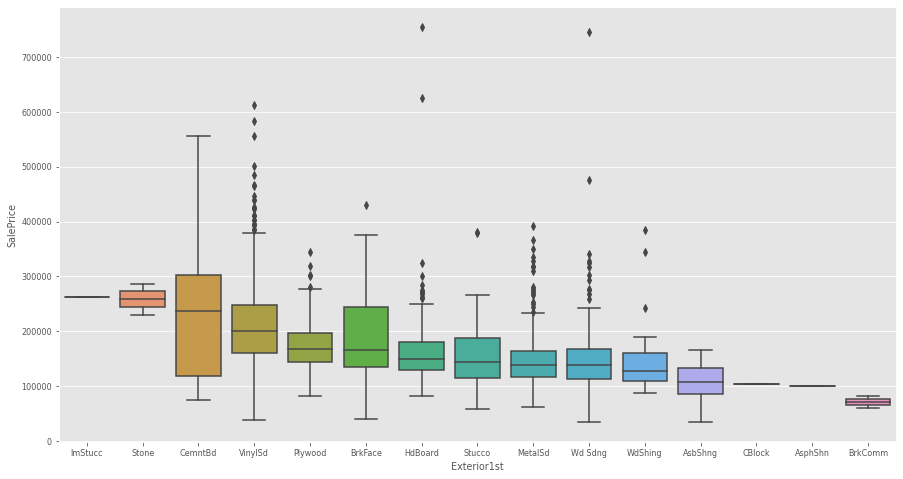

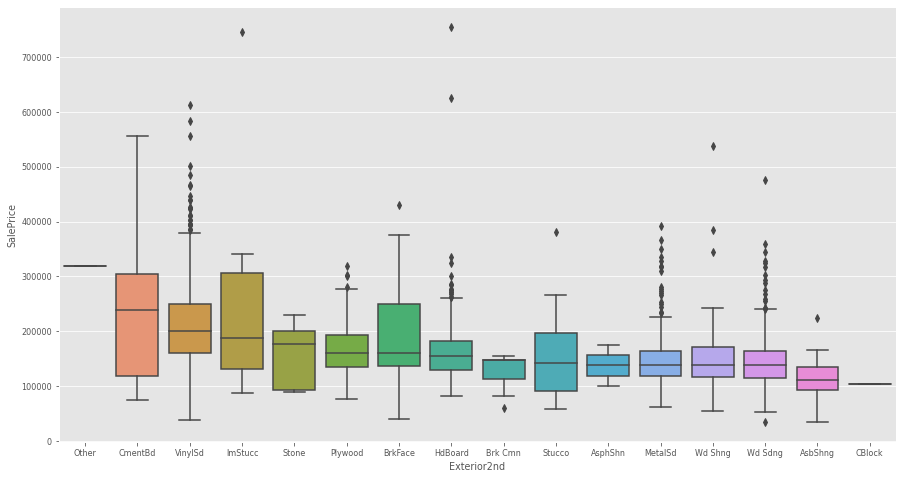

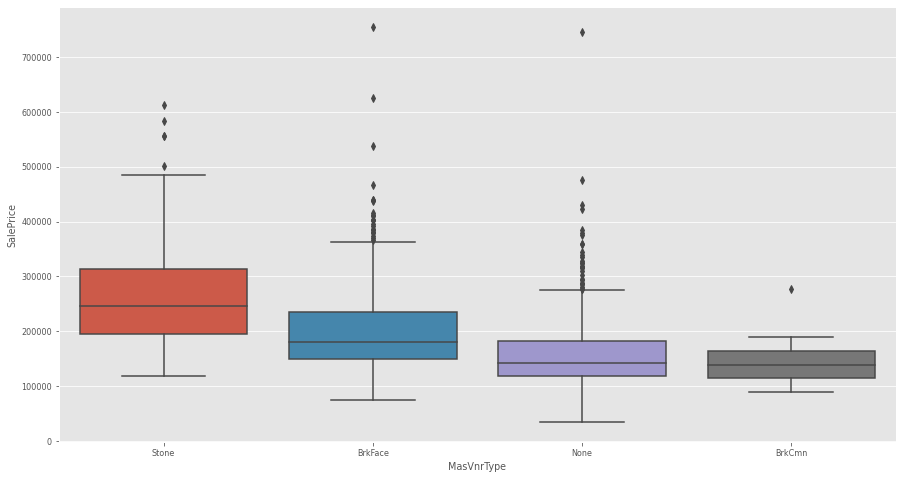

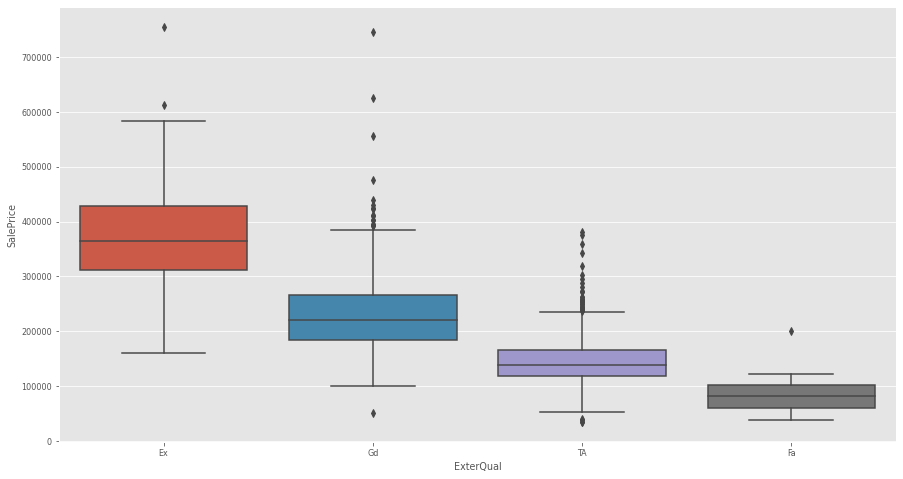

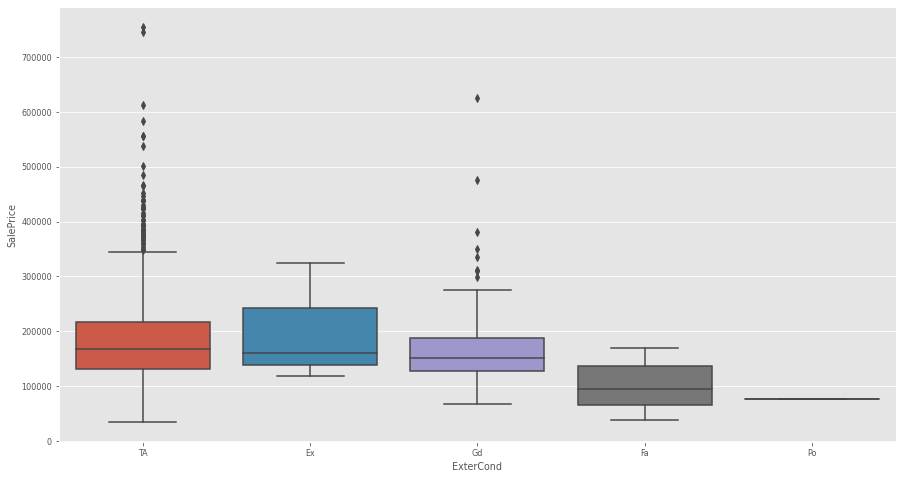

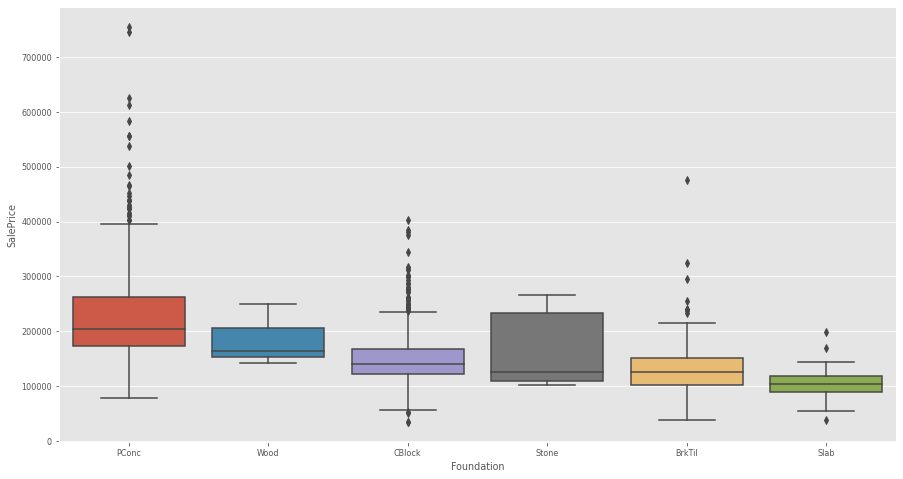

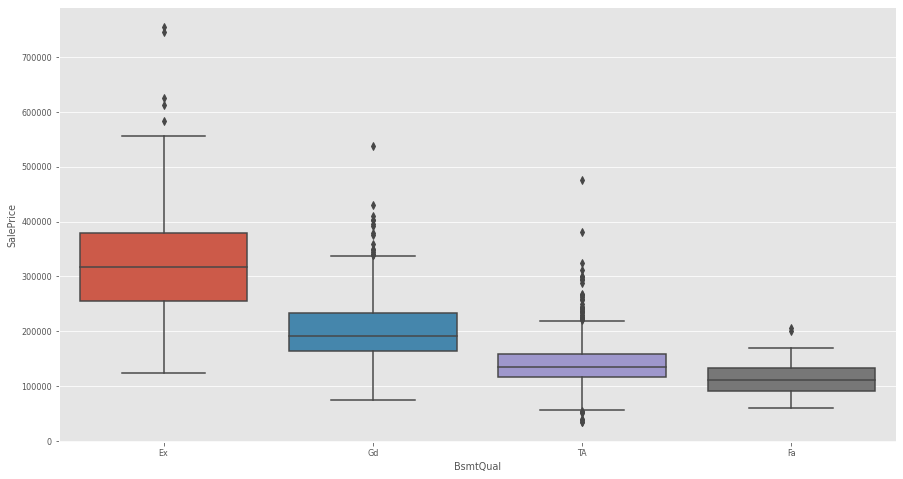

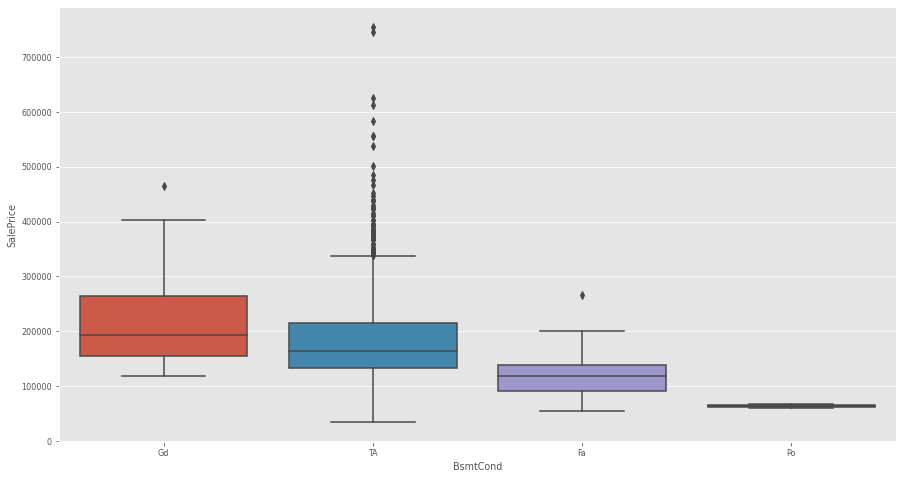

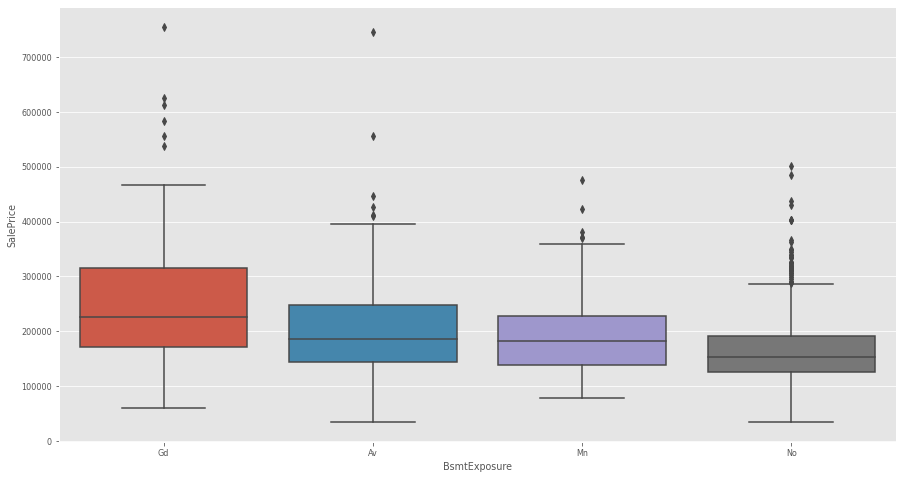

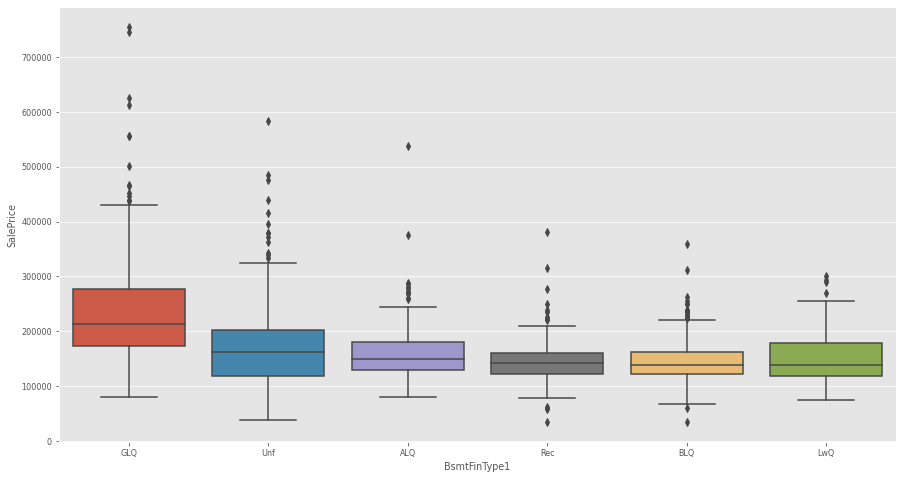

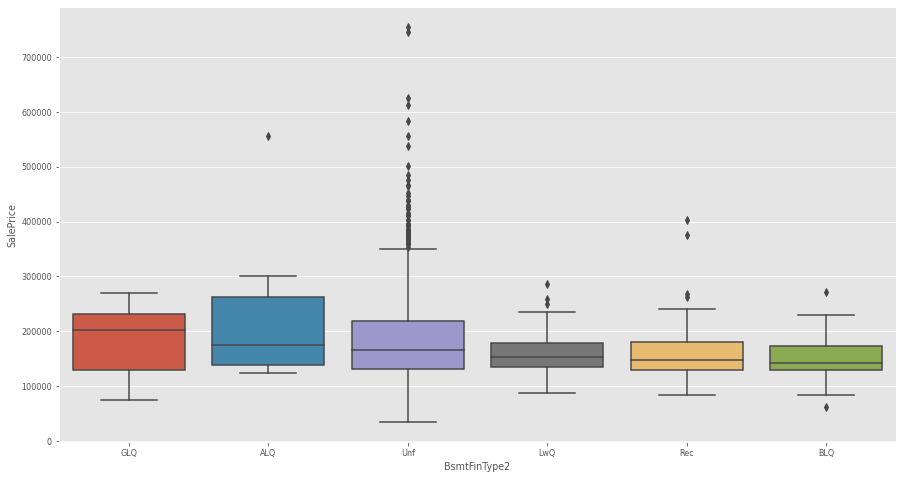

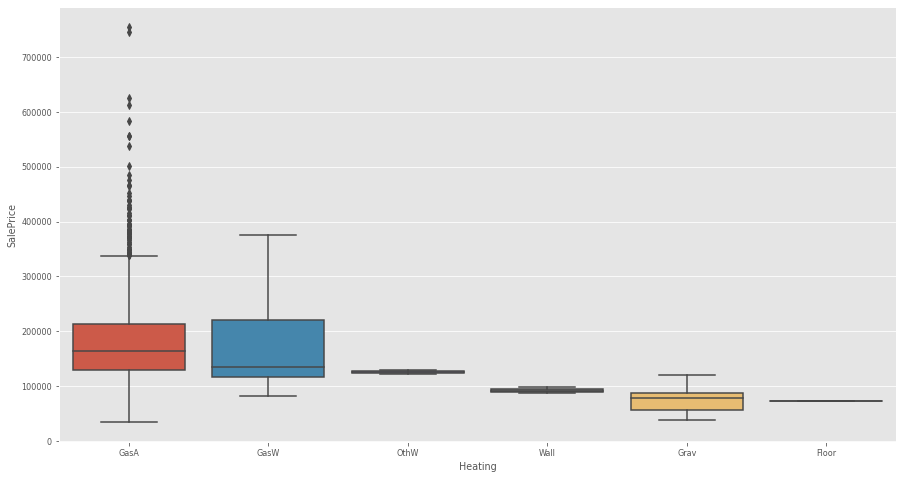

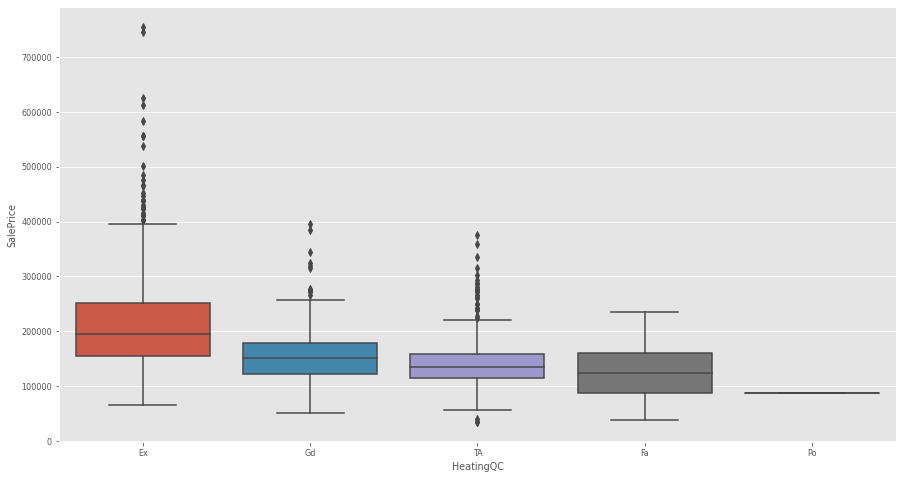

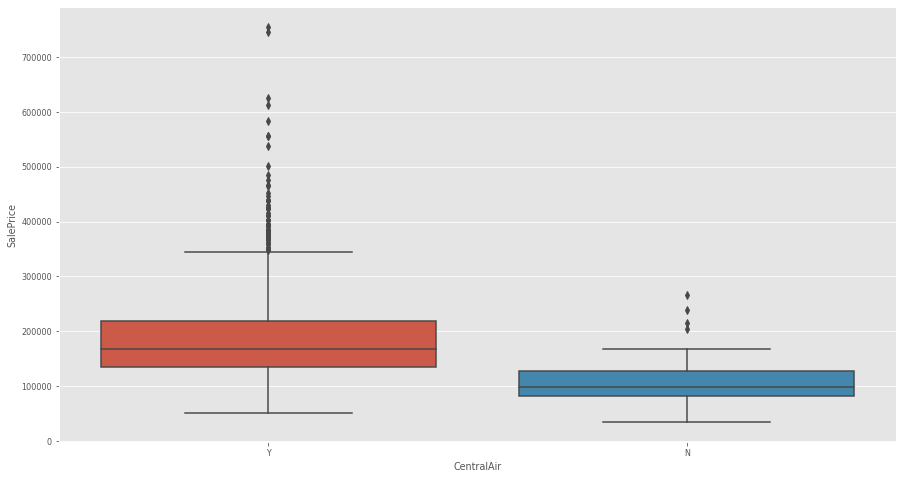

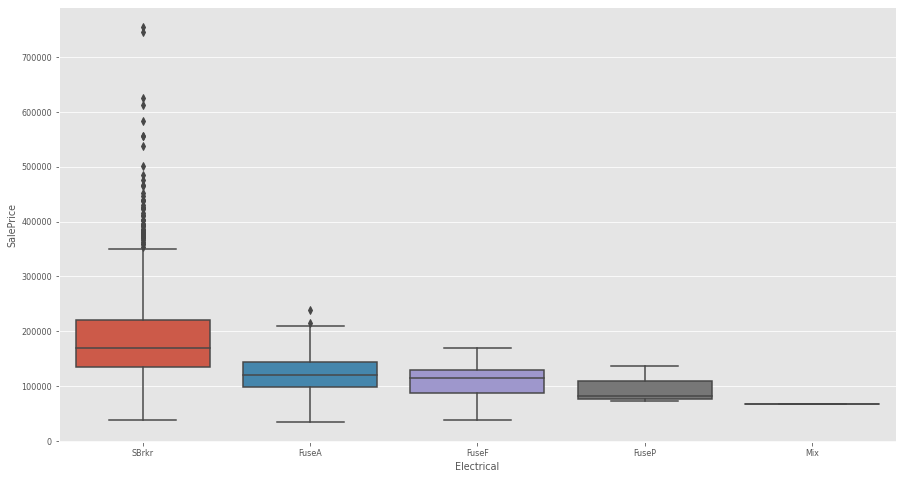

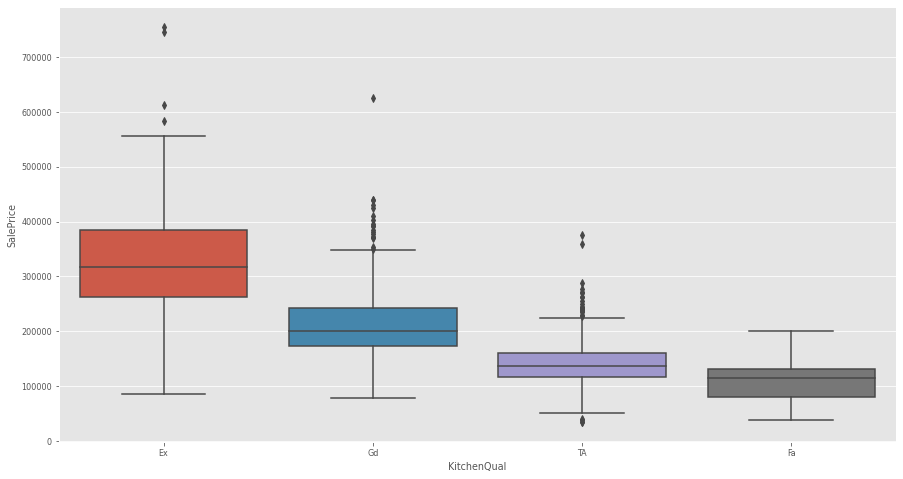

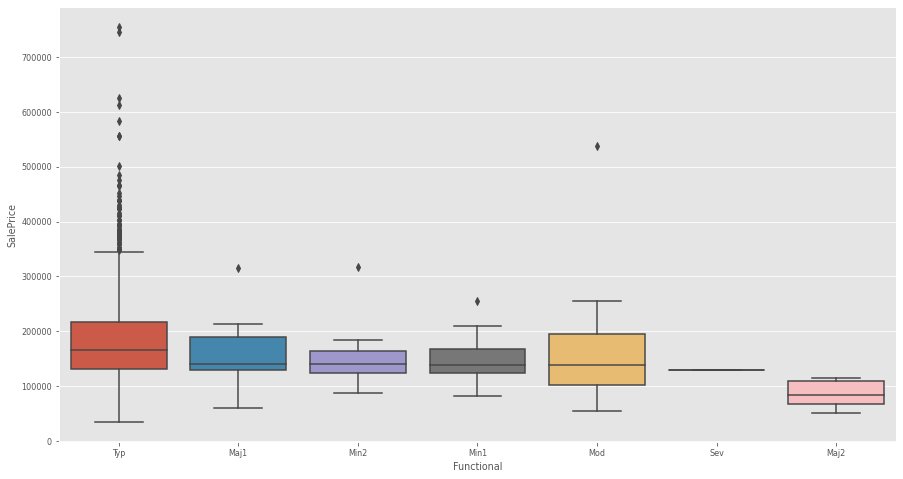

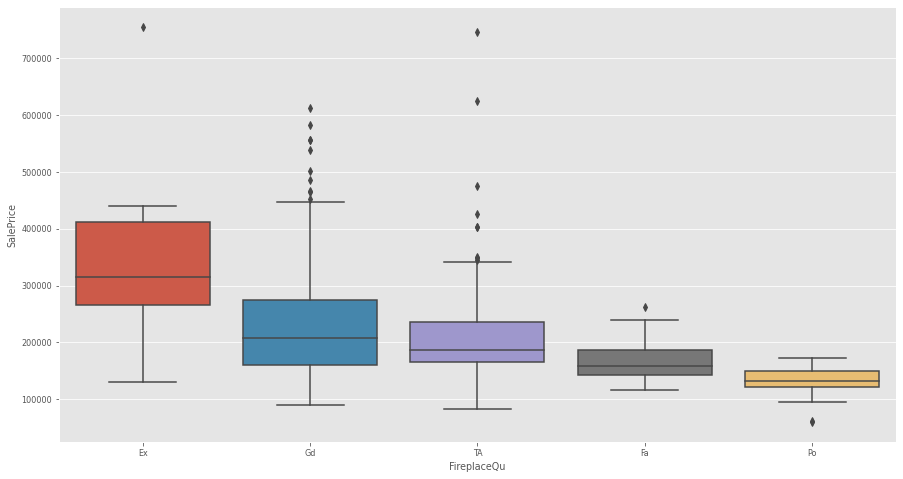

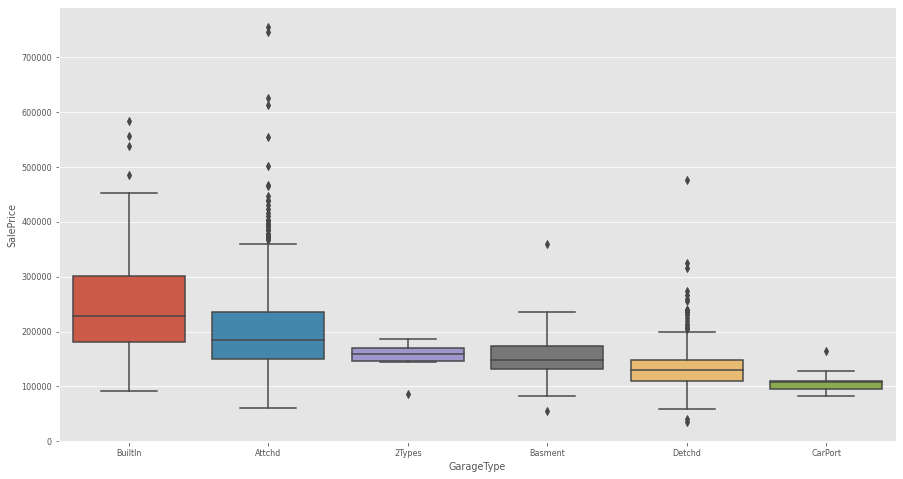

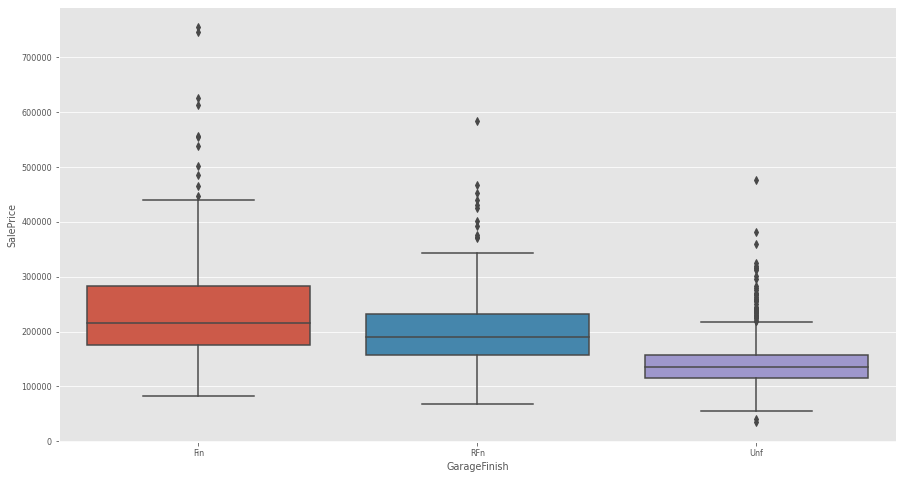

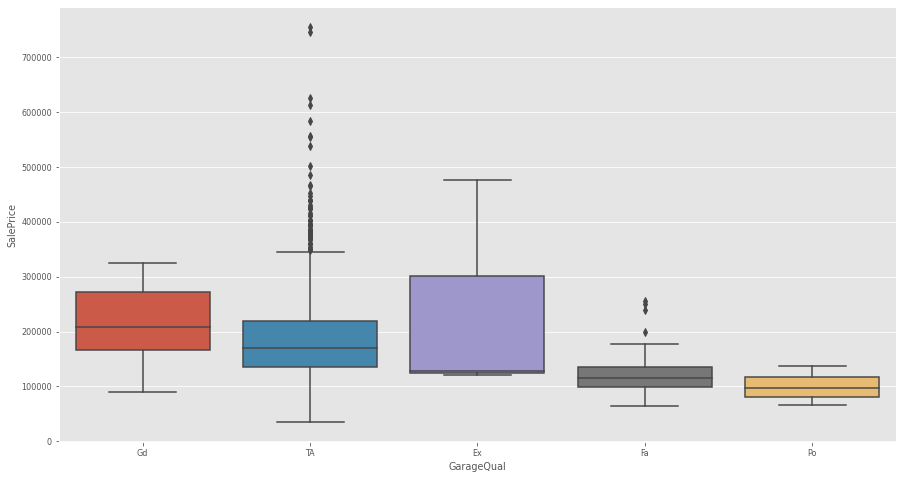

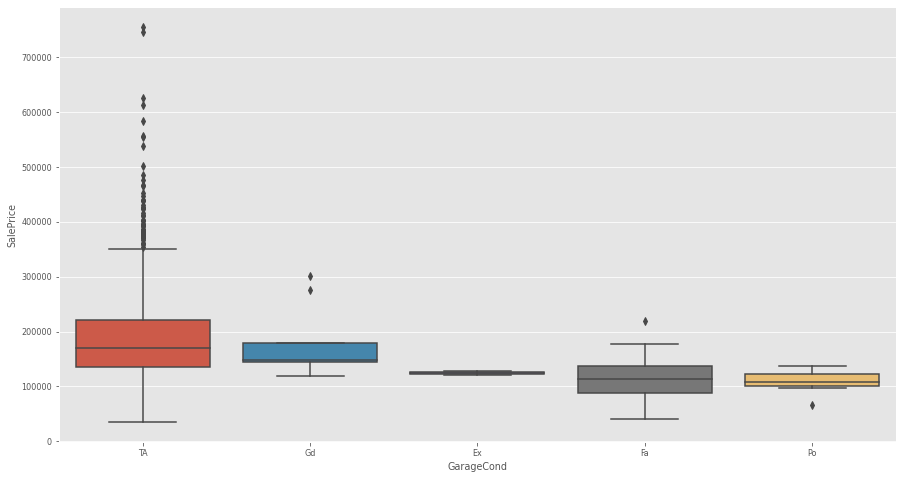

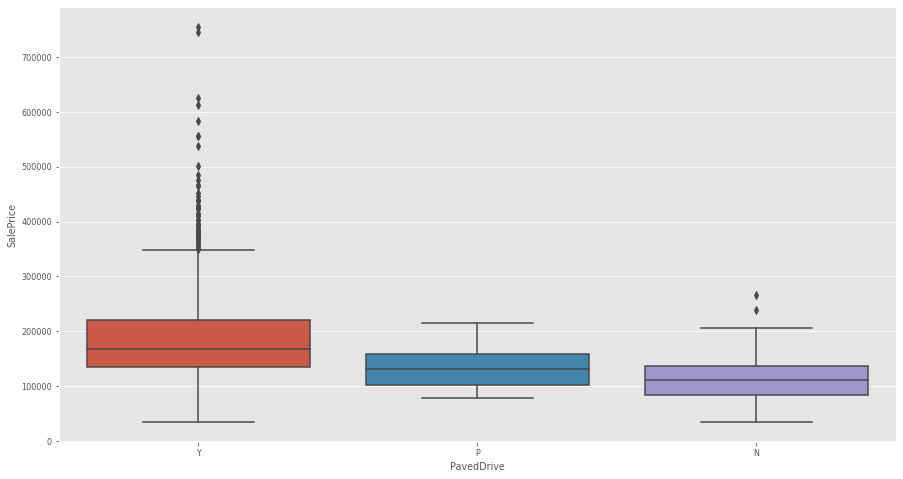

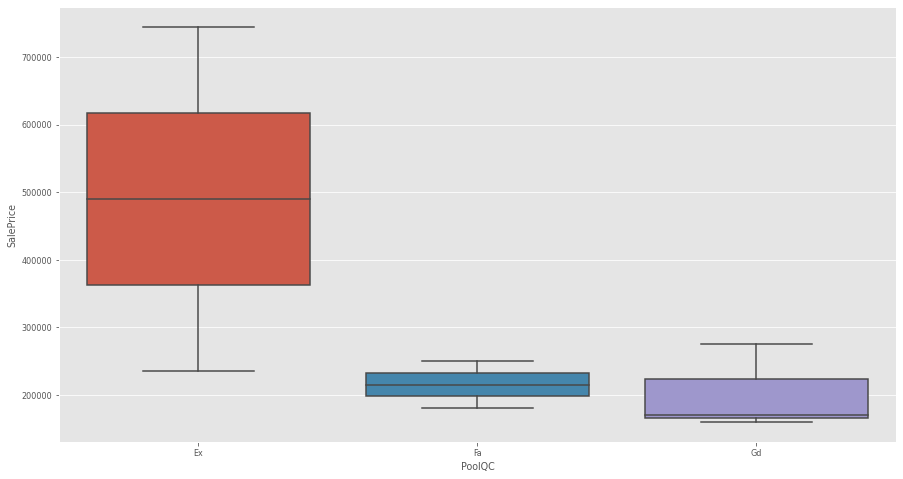

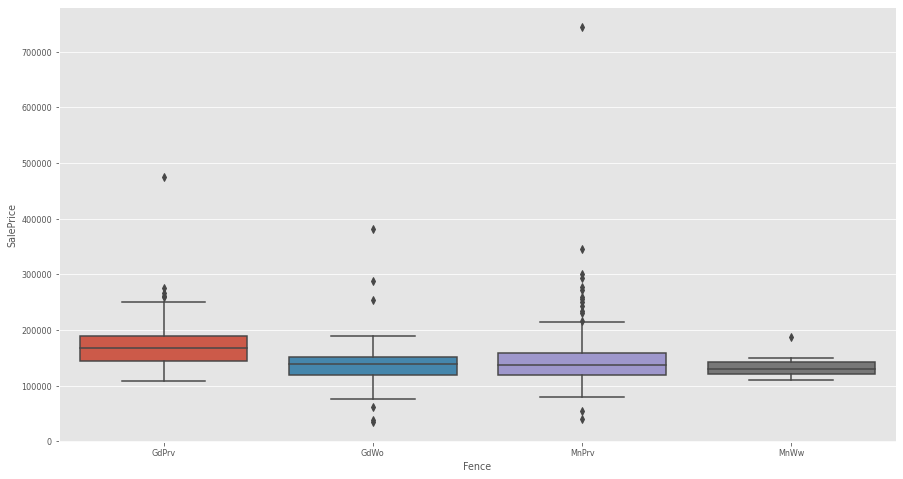

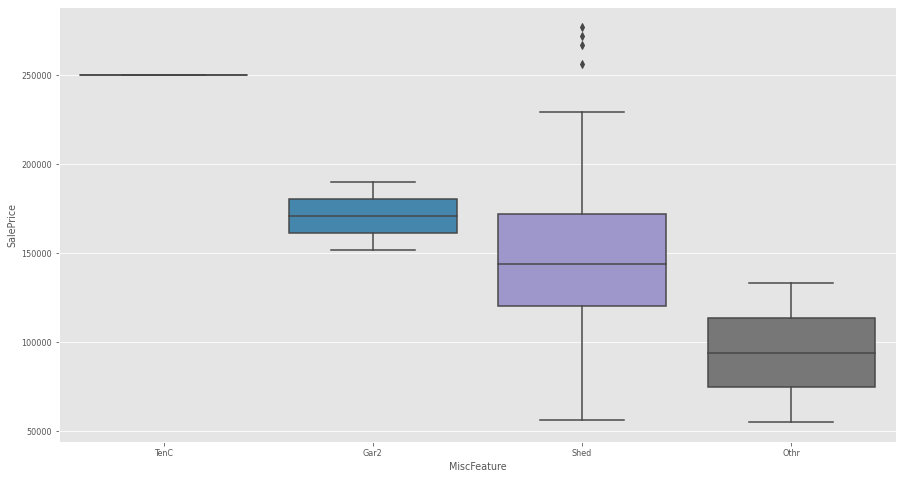

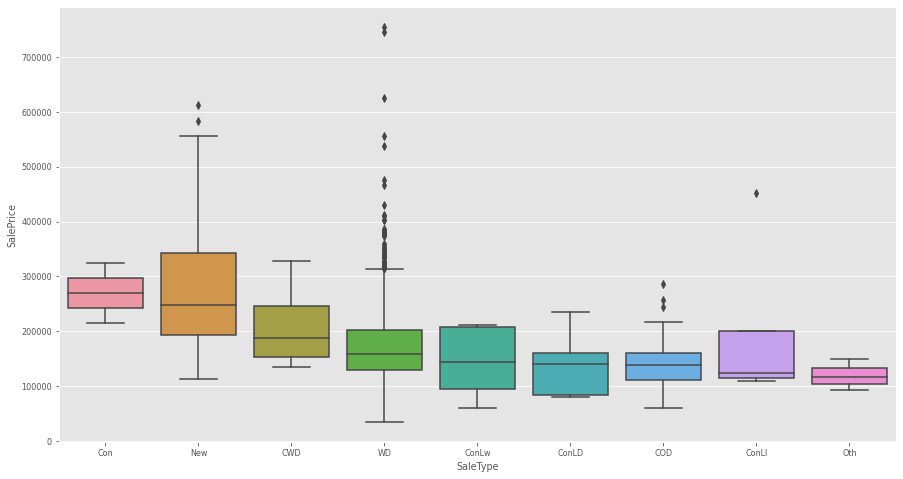

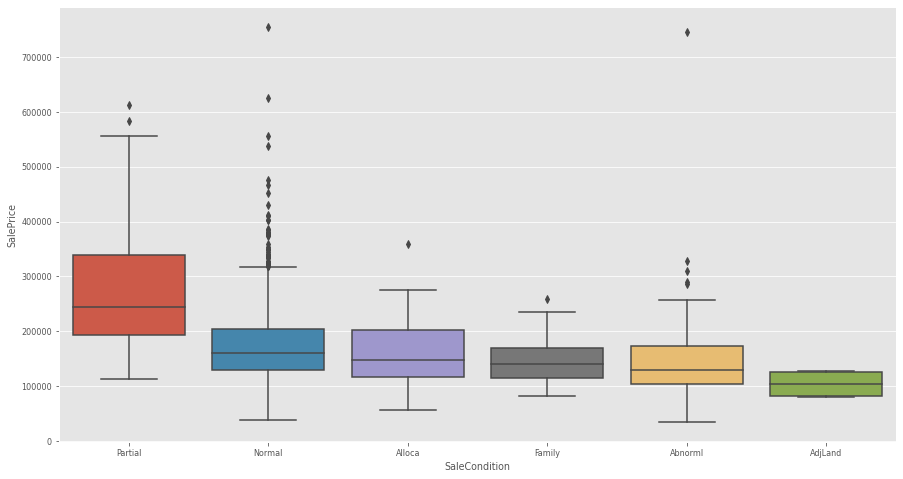

In [24]:
for cvar in catlist:   
    plt.figure(figsize = (15,8))
    
    temp = train.groupby([cvar])['SalePrice'].median().sort_values(ascending=False).reset_index()
    
    # Boxplot
    sns.boxplot(x=cat_train[cvar], 
                   y=num_train['SalePrice'],
               order = list(temp[cvar]))
    #ax.tick_params(axis='x', rotation=45)
    #ax.set_ylabel('Sale Price')
    #ax.set_xlabel(cvar)
    

# TRAIN MODEL

In [ ]:
## separate the input variables and output variables
PriceFeatures = train[['OverallQual','YearBuilt','YearRemodAdd',
             'MasVnrArea','MasVnrArea','TotalBsmtSF', 
             '1stFlrSF','GrLivArea','FullBath',
             'TotRmsAbvGrd','Fireplaces','GarageYrBlt',
             'GarageCars','GarageArea','Neighborhood']].copy()
#PriceFeatures = train[['OverallQual','YearBuilt','Neighborhood']].copy()
Price       = train['SalePrice']

In [ ]:
PriceFeatures

In [ ]:
# Generate the boolean flags indicating missing rows and columns
missingRows = PriceFeatures.isnull().any(axis=1)
missingCols = PriceFeatures.isnull().any()
print('The columns with missingness are %s' %(PriceFeatures.columns[missingCols]))
PriceFeatures = PriceFeatures[~missingRows]  # remove rows with missingness
Price = Price[~missingRows]

In [ ]:
PriceFeatures.groupby(['Neighborhood']).size().sort_values(ascending=False)

In [ ]:
dummy = pd.get_dummies(PriceFeatures['Neighborhood'], prefix='Neighborhood')
dummy

In [ ]:
dummy.drop('Neighborhood_NAmes', axis=1, inplace=True) 

In [ ]:
PriceFeatures = PriceFeatures.drop('Neighborhood', axis=1)  # drop the original Neighborhood feature
PriceFeatures = pd.concat([PriceFeatures, dummy], axis=1) # concat PriceFeatures and dummy horizontally
PriceFeatures.head()

# Baseline Model: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(PriceFeatures, Price)
residuals = Price - lm.predict(PriceFeatures)
plt.hist(residuals,bins=100);
print('R^2 is equal to %.3f' %(lm.score(PriceFeatures, Price)))
print('RSS is equal to %.3f' %(np.sum((lm.predict(PriceFeatures) - Price) ** 2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

In [ ]:
#print('negative slope column names %s' %(PriceFeatures.columns[lm.coef_<0]))
#print('positive slope column names %s' %(PriceFeatures.columns[lm.coef_>0]))

In [ ]:
plt.plot(lm.predict(PriceFeatures), 
         Price, 'ko')
x = np.linspace(0, 800000, 1000)
y = np.linspace(0, 800000, 1000)
plt.plot(x,y, 'r-')

plt.ylabel('Actual Sale Price')
plt.xlabel('Predicted Sale Price')
plt.xticks(rotation = 45); # Rotates X-Axis Ticks by 45-degrees


## Model 2: Lasso

In [ ]:
lasso  = Lasso()
alphas = np.linspace(0.1,500,50)
lasso.set_params(normalize=False)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(PriceFeatures, Price)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = PriceFeatures.columns)  
coefs_lasso.head()

In [ ]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)  

# Model X

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    PriceFeatures, Price, test_size=0.2, 
    random_state=0)

In [ ]:
# Grid Search 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
lasso  = Lasso()
params = {
    "alpha": [0, 10, 50, 100]
}

gs = GridSearchCV(lasso, params, scoring = 'r2', cv=skfold)
gs.fit(X_train, y_train)
gs.cv_results_['mean_test_score']

In [ ]:
#lasso  = Lasso()
#lasso.get_params().keys()